# Linear Regression

<span>Below is an example of a regression problem using linear regression to predict house prices from a dataset provided on Kaggle. The dataset can be found at the link below. Note that I have tried to reduce the amount of regularization found in sklearn's implementation of the model. As well as attempting to compare and contrast the performance of both statsmodel's linear regression model and sklearn's linear regression model. I try to avoid a lot of feature engineering here, as this notebook is just an example of the models.</span>

### Import Preliminaries

In [147]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import modules
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import pandas as pd 
import seaborn as sns
import statsmodels.api as sm
import warnings

from sklearn.datasets import load_diabetes
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.regression import linear_model


# Import models
from sklearn.linear_model import LinearRegression


# Set pandas options
pd.set_option('max_columns',1000)
pd.set_option('max_rows',100)

# Set plotting options
mpl.rcParams['figure.figsize'] = (8.0, 7.0)

# Set warning options
warnings.filterwarnings('ignore');

### Import Data

In [148]:
# Change dataframe to numpy array 
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Conduct a train-test-split on the data
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size=0.25)

In [149]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((331, 10), (111, 10), (331,), (111,))

### Target Outcomes

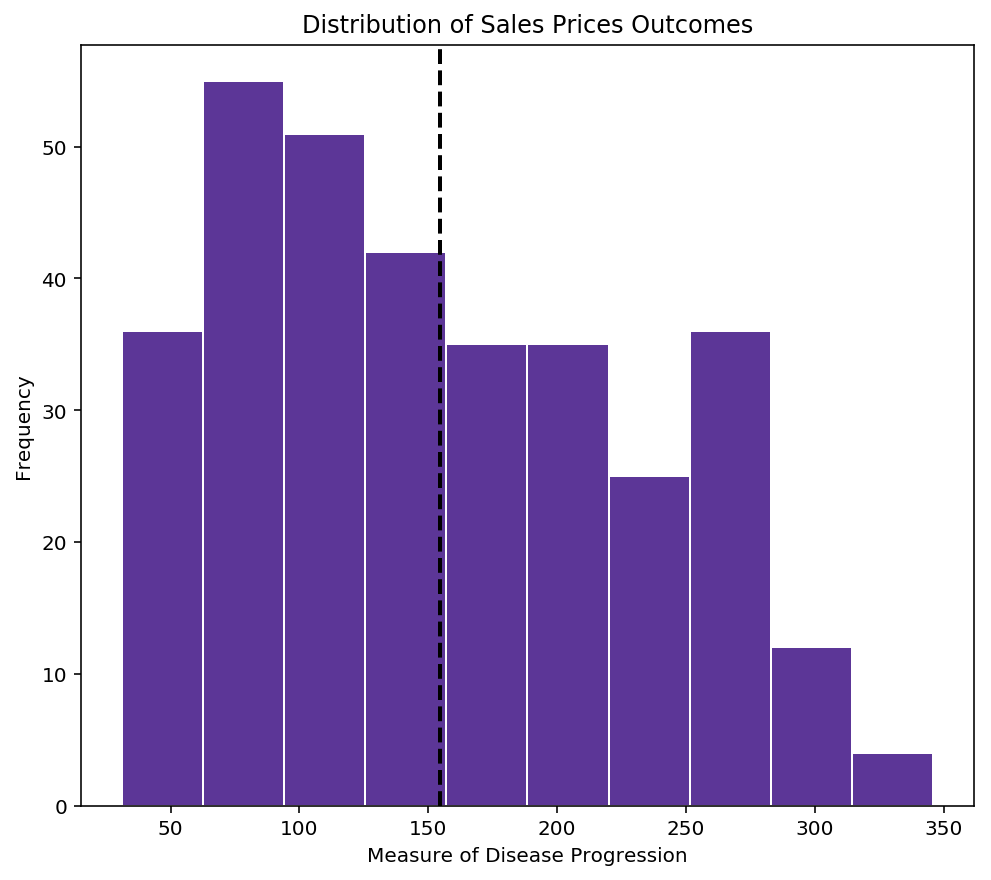

In [150]:
# Plot a histogram of all the home price valuse
pd.Series(train_y).plot.hist(grid=False, color='#5C3697', edgecolor='w',)
plt.title('Distribution of Sales Prices Outcomes')
plt.ylabel('Frequency')
plt.xlabel('Measure of Disease Progression')
plt.axvline(pd.Series(train_y).mean(), color='black', linestyle='dashed', linewidth=2);

### Linear Regression

In [151]:
# Fit a linear model
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [152]:
# Calculate our cross validation score
cross_val_score(lr_model, train_x, train_y, cv=10, 
                scoring='r2').mean()

0.48092328501357828

Our cross validation score on our training set was pretty good, considering the best scores from Kaggle Competition competitors hovers around 80.

### Viewing Residuals

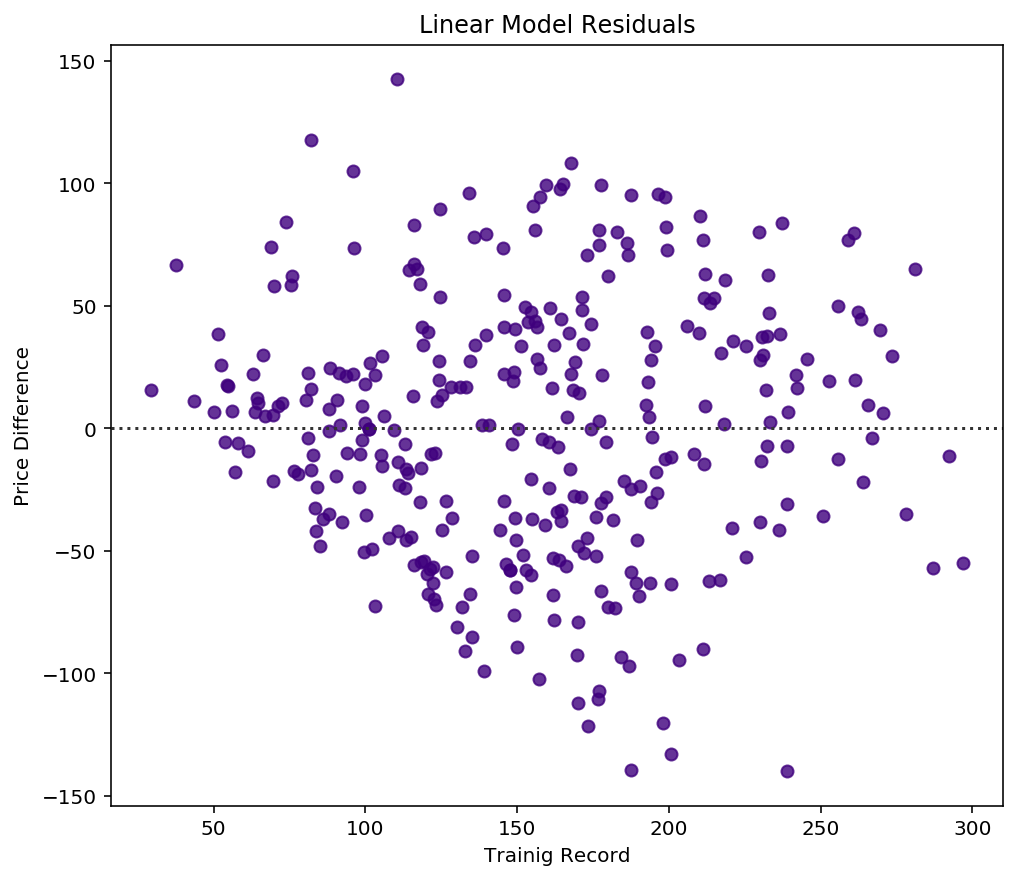

In [153]:
# Plotting residuals from our model
pred_y = lr_model.predict(train_x)
sns.residplot(pred_y, train_y, color='#3F007D');
plt.title('Linear Model Residuals')
plt.ylabel('Price Difference')
plt.xlabel('Trainig Record');

### Using Stat Models

Using thest stats models can give us a bit more information about the linear regression then sklearn. So lets give it a try.

In [154]:
# Conduct linear regression via stats model's API
train_x = sm.add_constant(train_x)
myregression = linear_model.OLS(train_y, train_x).fit()
myregression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     37.07
Date:                Tue, 11 Sep 2018   Prob (F-statistic):           8.58e-48
Time:                        03:07:24   Log-Likelihood:                -1779.6
No. Observations:                 331   AIC:                             3581.
Df Residuals:                     320   BIC:                             3623.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.6942      2.932     52.758      0.000     148.925     160.463
x1           -14.5530     69.774     -0.209      0.835    -151.827     122.721
x2          -232.6718     71.251     -3.266      0.001    -372.852     -92.491
x3           549.7459     74.857      7.344      0.000     402.472     697.019
x4           247.9180     75.369      3.289      0.001      99.636     396.200
x5          -493.2661    509.467     -0.968      0.334   -1495.595     509.063
x6           198.7543    419.941      0.473      0.636    -627.439    1024.948
x7           -76.4805    254.559     -0.300      0.764    -577.301     424.340
x8            80.1094    181.427      0.442      0.659    -276.832     437.051
x9           742.7372    202.453      3.669      0.000     344.430    1141.044
x10           70.9774     75.480      0.940      0.348     -77.522     219.476
==============================================================================
Omnibus:                        2.383   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.304   Jarque-Bera (JB):                2.015
Skew:                          -0.069   Prob(JB):                        0.365
Kurtosis:                       2.643   Cond. No.                         245.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Author: Kavi Sekhon